Generate a synthetic dataset with random values

|        Age      |      Salary       |      No. of Family Members        |      Buys of Flat        |
|-----------------|-------------------|-----------------------------------|--------------------------|
|                 |                   |                                   |                          |

Design an MP Neuron model to predict the output using step function

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


### Creating a Dataframe 

In [2]:
data = []

for i in range(20):
    data.append([random.randint(25,50), random.randint(1, 25) * 100000, random.randint(2,6), random.randint(0,1)])
    
df = pd.DataFrame(data, columns=['age', 'salary', 'family_members', 'buys_of_flat'])

display(df)

,age,salary,family_members,buys_of_flat
0,43,2000000,2,0
1,48,800000,6,0
2,37,1500000,3,1
3,48,1100000,5,1
4,43,300000,3,0
5,42,2400000,3,0
6,37,1700000,2,0
7,35,1200000,5,0
8,30,1600000,4,1
9,45,700000,2,1


### Test Train Split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop('buys_of_flat', axis=1)
Y = df['buys_of_flat']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3 , stratify=Y)


In [5]:
X.shape, X_train.shape, X_test.shape

((20, 3), (14, 3), (6, 3))

In [6]:
Y.shape, Y_train.shape, Y_test.shape

((20,), (14,), (6,))

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
class Perceptron:
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, itrs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(itrs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        wt = self.w
        bias = self.b
        
      self.w = wt
      self.b = bias

    plt.plot(accuracy.values())
    plt.ylim([0, 1])
    plt.show()
    
    print('Max Accuracy : ',max_accuracy)
    
    return np.array(wt_matrix)

In [9]:
perceptron = Perceptron()

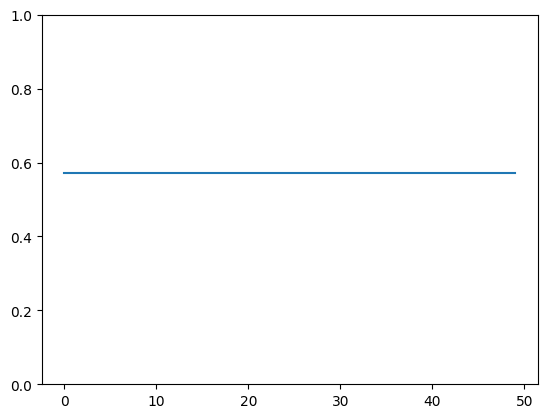

Max Accuracy :  0.5714285714285714


In [10]:
wt_matrix = perceptron.fit(np.array(X_train), np.array(Y_train), 50, 0.01)

In [11]:
Y_pred_test = perceptron.predict(np.array(X_test))
accuracy_test = accuracy_score(Y_pred_test, Y_test)

In [12]:
accuracy_test

0.6666666666666666